In [5]:
import torch
x = torch.Tensor(5, 3)
print(x)
print(x.size())

tensor([[1.7753e+28, 7.0744e+31, 4.4561e+27],
        [1.2401e-14, 1.8888e+31, 1.9421e+20],
        [1.2689e+31, 3.2745e-12, 2.6209e+20],
        [2.0530e-19, 6.8609e+22, 9.1041e-12],
        [6.2609e+22, 4.7428e+30, 3.5833e-14]])
torch.Size([5, 3])


In [6]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
z = x + y
print(z)

tensor([[1.6131, 0.4714, 0.6380],
        [0.7998, 1.5988, 1.3151],
        [0.8644, 0.7555, 0.6001],
        [0.8051, 0.7960, 0.6516],
        [0.6091, 1.3769, 0.9910]])


In [16]:
torch.cuda.is_available()

True

In [29]:
x = x.cuda()
y = y.cuda()
z = x + y
z.size()



torch.Size([5, 3])

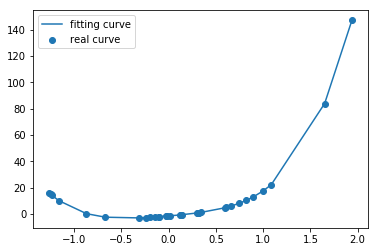

Loss: 0.000518 after 760 batches
==> Learned function:	y = +6.07 x^3+3.91 x^3+0.90 x^3+8.19 x^3-1.64
==> Actual function:	y = +6.13 x^3+3.89 x^3+0.86 x^3+8.20 x^3-1.62


In [43]:
from __future__ import print_function
from itertools import count

import numpy as np
import torch
import torch.autograd
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

random_state = 5000
torch.manual_seed(random_state)
POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5


def make_features(x):
	""""创建一个矩阵特征结构为[x,x^2,x^3,x^4]"""
	x = x.unsqueeze(1)
	return torch.cat([x ** i for i in range(1, POLY_DEGREE + 1)], 1)


def f(x):
	""""近似函数"""
	return x.mm(W_target) + b_target[0]


def poly_desc(W, b):
	""""生成多项式描述内容"""
	result = 'y = '
	for i, w in enumerate(W):
		result += '{:+.2f} x^{}'.format(w, len(W) - 1)
	result += '{:+.2f}'.format(b[0])
	return result


def get_batch(batch_size=32):
	""""创建批处理数据"""
	random = torch.from_numpy(np.sort(torch.randn(batch_size)))
	x = make_features(random)
	y = f(x)
	return Variable(x), Variable(y)

# 声明模型
fc = torch.nn.Linear(W_target.size(0), 1)

for batch_idx in count(1):
	# 获取数据
	batch_x, batch_y = get_batch()
	# 重置求导
	fc.zero_grad()
	# 前向传播
	output = F.smooth_l1_loss(fc(batch_x), batch_y)
	loss = output.data
	# 后向传播
	output.backward()
	# 应用导数
	for param in fc.parameters():
		param.data.add_(-0.1 * param.grad.data)
		
	# 停止条件
	if loss < 1e-3:
		plt.cla()
		plt.scatter(batch_x.data.numpy()[:,0], batch_y.data.numpy()[:,0],
					label='real curve')
		plt.plot(batch_x.data.numpy()[:,0], fc(batch_x).data.numpy()[:,0],
				 label='fitting curve')
		plt.legend()
		plt.show()
		break
		
print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))
print('==> Learned function:\t' + poly_desc(fc.weight.data.view(-1),											fc.bias.data))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))



In [31]:
# tensor和numpy互相转化
a = torch.rand(5, 3)
b = a.numpy()
c = torch.from_numpy(b)
print(a, b, c)

tensor([[0.6391, 0.7586, 0.6794],
        [0.9771, 0.9804, 0.5580],
        [0.8558, 0.4701, 0.6872],
        [0.1746, 0.2371, 0.2437],
        [0.2744, 0.8155, 0.6093]]) [[0.63909566 0.7585931  0.67940766]
 [0.977069   0.9804133  0.5579735 ]
 [0.85578376 0.47014773 0.68724155]
 [0.17461765 0.2370944  0.24373335]
 [0.27437842 0.81553364 0.6093008 ]] tensor([[0.6391, 0.7586, 0.6794],
        [0.9771, 0.9804, 0.5580],
        [0.8558, 0.4701, 0.6872],
        [0.1746, 0.2371, 0.2437],
        [0.2744, 0.8155, 0.6093]])


In [45]:
m = torch.nn.Tanh()
input = Variable(torch.randn(5))
print(input)
print(m(input))

tensor([-0.7647, -0.0349, -0.3636, -0.6705,  0.5447])


tensor([-0.6438, -0.0349, -0.3484, -0.5853,  0.4965])


In [51]:
import torch.autograd
from torch.autograd import Variable

x = Variable(torch.ones(2, 3), requires_grad=True)
print(x)
y = x +2
print(y)
print(y.grad_fn)
z = y*y*3
out = z.mean()
print(z, out)
out.backward()

tt = torch.optim.


tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[3., 3., 3.],
        [3., 3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27., 27.],
        [27., 27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [52]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.datasets import load_iris
from torch.autograd import Variable
from torch.optim import SGD

use_cuda = torch.cuda.is_available()
print("use_cuda: ", use_cuda)

iris = load_iris()
print(iris.keys())




